<a href="https://colab.research.google.com/github/akshat01112001/ML_Assignment/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation

## Importing Necessary Libraries

In [ ]:
# Done by
# 2019B1A31551H Deepak Gouni
# 2020A8PS1162H Srikanth Mangipudi
# 2020A7PS0034H Akshat Kumar

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset

In [ ]:
df = pd.read_csv('Dsata Set for Assignment 1.csv')

# Feature Engineering

## Deletion of NaN Values

In [ ]:
df = df.dropna()

## Missing Values

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['radius_mean'].fillna(np.mean(df['radius_mean']),inplace = True)

In [ ]:
df['perimeter_mean'].fillna(np.mean(df['perimeter_mean']),inplace = True)

In [ ]:
df['concavity_mean'].fillna(np.mean(df['concavity_mean']),inplace = True)

In [ ]:
df['compactness_se'].fillna(np.mean(df['compactness_se']),inplace = True)

In [ ]:
df['area_worst'].fillna(np.mean(df['area_worst']),inplace = True)

In [ ]:
df['concavity_worst'].fillna(np.mean(df['concavity_worst']),inplace = True)

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Standard Score (Z-Score) Conversion

In [ ]:
# Z-score conversion
for column in df.columns:
  if(column=='diagnosis' or column=='id'):
    continue
  mean = np.mean(df[column])
  std_dev = np.std(df[column])
  df[column] = np.divide(np.subtract(df[column], mean), std_dev)

# Separation of features and label
X = df.drop(['diagnosis','id'],axis=1).values
y = df['diagnosis'].values

# Splitting of dataset in training set and test set
test_size = 0.33
n_samples = X.shape[0]
test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets

# Label Encoding and Dataset Splitting

In [ ]:
# Label encoding of diagnosis
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 0
df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 1

# Separation of features and label
X = df.drop(['diagnosis','id'],axis=1).values
y = df['diagnosis'].values

# Splitting of dataset in training set and test set
test_size = 0.33
n_samples = X.shape[0]
test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets

# Part A - Perceptron Learning Algorithm

## Perception class

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, max_iter=1000, random_state=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        # Set random seed
        if self.random_state is not None:
            random.seed(self.random_state)
        
        # Initialize weights and bias
        self.w = np.array([random.random() for i in range(X.shape[1])])
        self.b = random.random()
        
        # Train the perceptron
        for i in range(self.max_iter):
            for xi, yi in zip(X, y):
                if yi * (np.dot(xi, self.w) + self.b) <= 0:
                    self.w += self.learning_rate * yi * xi
                    self.b += self.learning_rate * yi
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

## Perceptron Model - PM1

### Model Fitting and Prediction

In [ ]:
# Define the number of iterations
num_iterations = 10

# Create an empty array to store the accuracy results
acc_results = np.zeros(num_iterations)

# Create empty arrays to store precision and recall scores
precision_scores = np.zeros(num_iterations)
recall_scores = np.zeros(num_iterations)

for i in range(num_iterations):
    # Separation of features and label
    X = df.drop(['diagnosis','id'],axis=1).values
    y = df['diagnosis'].values

    # Splitting of dataset in training set and test set
    test_size = 0.33
    n_samples = X.shape[0]
    test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
    train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
    X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
    y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets
    
    # Create a Perceptron model
    pm1 = Perceptron()

    # Fit the model to the training data
    pm1.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pm1.predict(X_test)
    y_pred[y_pred == -1] = 0

    # Calculate the accuracy of the model
    pm1_acc = np.mean(y_pred == y_test)
    acc_results[i] = pm1_acc
    print(f"PM1 accuracy for iteration {i+1}: {pm1_acc}")

    # Calculate the precision and recall scores
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    false_positives = np.sum((y_test == 0) & (y_pred == 1))
    false_negatives = np.sum((y_test == 1) & (y_pred == 0))

    precision_scores[i] = true_positives / (true_positives + false_positives)
    recall_scores[i] = true_positives / (true_positives + false_negatives)

# Calculate the mean, variance, precision, and recall of the accuracy results
mean_acc = np.mean(acc_results)
acc_var = np.var(acc_results)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

# Print the final results
print(f"Average PM1 accuracy over {num_iterations} iterations: {mean_acc}")
print(f"Variance of PM1 accuracy over {num_iterations} iterations: {acc_var}")
print(f"Mean precision score of PM1 over {num_iterations} iterations: {mean_precision}")
print(f"Mean recall score of PM1 over {num_iterations} iterations: {mean_recall}")

PM1 accuracy for iteration 1: 0.572972972972973
PM1 accuracy for iteration 2: 0.6270270270270271
PM1 accuracy for iteration 3: 0.6378378378378379
PM1 accuracy for iteration 4: 0.6432432432432432
PM1 accuracy for iteration 5: 0.654054054054054
PM1 accuracy for iteration 6: 0.5783783783783784
PM1 accuracy for iteration 7: 0.5891891891891892
PM1 accuracy for iteration 8: 0.6486486486486487
PM1 accuracy for iteration 9: 0.654054054054054
PM1 accuracy for iteration 10: 0.654054054054054
Average PM1 accuracy over 10 iterations: 0.625945945945946
Variance of PM1 accuracy over 10 iterations: 0.0009747260774287799
Mean precision score of PM1 over 10 iterations: 0.625945945945946
Mean recall score of PM1 over 10 iterations: 1.0


## Perceptron Model - PM2

### Model Fitting and Prediction

In [ ]:
# Define the number of iterations
num_iterations = 10

# Create an empty array to store the accuracy results
acc_results = np.zeros(num_iterations)

# Create empty arrays to store precision and recall scores
precision_scores = np.zeros(num_iterations)
recall_scores = np.zeros(num_iterations)

for i in range(num_iterations):
    # Separation of features and label
    X = df.drop(['diagnosis','id'],axis=1).values
    y = df['diagnosis'].values

    # Splitting of dataset in training set and test set
    test_size = 0.33
    n_samples = X.shape[0]
    test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
    train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
    X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
    y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets
    
    # Create a Perceptron model
    pm2 = Perceptron()

    # Fit the model to the training data (with reversed order)
    pm2.fit(X_train[::-1], y_train[::-1])

    # Make predictions on the test data
    y_pred = pm2.predict(X_test)
    y_pred[y_pred == -1] = 0

    # Calculate the accuracy of the model
    pm2_acc = np.mean(y_pred == y_test)
    acc_results[i] = pm2_acc
    print(f"PM2 accuracy for iteration {i+1}: {pm2_acc}")

    # Calculate the precision and recall scores
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    false_positives = np.sum((y_test == 0) & (y_pred == 1))
    false_negatives = np.sum((y_test == 1) & (y_pred == 0))

    precision_scores[i] = true_positives / (true_positives + false_positives)
    recall_scores[i] = true_positives / (true_positives + false_negatives)

# Calculate the mean, variance, precision, and recall of the accuracy results
mean_acc = np.mean(acc_results)
acc_var = np.var(acc_results)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

# Print the final results
print(f"Average PM2 accuracy over {num_iterations} iterations: {mean_acc}")
print(f"Variance of PM2 accuracy over {num_iterations} iterations: {acc_var}")
print(f"Mean precision score of PM2 over {num_iterations} iterations: {mean_precision}")
print(f"Mean recall score of PM2 over {num_iterations} iterations: {mean_recall}")

PM2 accuracy for iteration 1: 0.6594594594594595
PM2 accuracy for iteration 2: 0.6270270270270271
PM2 accuracy for iteration 3: 0.6486486486486487
PM2 accuracy for iteration 4: 0.6054054054054054
PM2 accuracy for iteration 5: 0.5837837837837838
PM2 accuracy for iteration 6: 0.6594594594594595
PM2 accuracy for iteration 7: 0.6378378378378379
PM2 accuracy for iteration 8: 0.6378378378378379
PM2 accuracy for iteration 9: 0.6702702702702703
PM2 accuracy for iteration 10: 0.5837837837837838
Average PM2 accuracy over 10 iterations: 0.6313513513513513
Variance of PM2 accuracy over 10 iterations: 0.0008695398100803508
Mean precision score of PM2 over 10 iterations: 0.6313513513513513
Mean recall score of PM2 over 10 iterations: 1.0


## Perceptron Model - PM3

### Model Fitting and Prediction


In [ ]:
# Define the number of iterations
num_iterations = 10

# Create an empty array to store the accuracy results
acc_results = np.zeros(num_iterations)

# Create empty arrays to store precision and recall scores
precision_scores = np.zeros(num_iterations)
recall_scores = np.zeros(num_iterations)

for i in range(num_iterations):
    # Separation of features and label
    X = df.drop(['diagnosis','id'],axis=1).values
    y = df['diagnosis'].values

    # Splitting of dataset in training set and test set
    test_size = 0.33
    n_samples = X.shape[0]
    test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
    train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
    X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
    y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets
    
    # Create a Perceptron model
    pm3 = Perceptron()

    # Fit the model to the training data
    pm3.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pm3.predict(X_test)
    y_pred[y_pred == -1] = 0

    # Calculate the accuracy of the model
    pm3_acc = np.mean(y_pred == y_test)
    acc_results[i] = pm3_acc
    print(f"PM3 accuracy for iteration {i+1}: {pm3_acc}")

    # Calculate the precision and recall scores
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    false_positives = np.sum((y_test == 0) & (y_pred == 1))
    false_negatives = np.sum((y_test == 1) & (y_pred == 0))

    precision_scores[i] = true_positives / (true_positives + false_positives)
    recall_scores[i] = true_positives / (true_positives + false_negatives)

# Calculate the mean, variance, precision, and recall of the accuracy results
mean_acc = np.mean(acc_results)
acc_var = np.var(acc_results)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

# Print the final results
print(f"Average PM3 accuracy over {num_iterations} iterations: {mean_acc}")
print(f"Variance of PM3 accuracy over {num_iterations} iterations: {acc_var}")
print(f"Mean precision score of PM3 over {num_iterations} iterations: {mean_precision}")
print(f"Mean recall score of PM3 over {num_iterations} iterations: {mean_recall}")

PM3 accuracy for iteration 1: 0.8648648648648649
PM3 accuracy for iteration 2: 0.7783783783783784
PM3 accuracy for iteration 3: 0.7243243243243244
PM3 accuracy for iteration 4: 0.745945945945946
PM3 accuracy for iteration 5: 0.772972972972973
PM3 accuracy for iteration 6: 0.8162162162162162
PM3 accuracy for iteration 7: 0.918918918918919
PM3 accuracy for iteration 8: 0.9459459459459459
PM3 accuracy for iteration 9: 0.7891891891891892
PM3 accuracy for iteration 10: 0.8162162162162162
Average PM3 accuracy over 10 iterations: 0.8172972972972973
Variance of PM3 accuracy over 10 iterations: 0.004714682249817385
Mean precision score of PM3 over 10 iterations: 0.7841382135359278
Mean recall score of PM3 over 10 iterations: 0.998326330532213


## Perceptron Model - PM4

### Randomisation of Features

In [ ]:
# Randomize the order of the features
cols = list(df.columns)
np.random.shuffle(cols)

# use the shuffled list of column names to reorder the DataFrame
df = df[cols]
X = df.drop(['diagnosis','id'],axis=1).values
y = df['diagnosis'].values

# Splitting of dataset in training set and test set
test_size = 0.33
n_samples = X.shape[0]
test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets

### Model Fitting and Prediction

In [ ]:
y[test_idx] # split labels into training and test sets
    # Define the number of iterations
num_iterations = 10

# Create an empty array to store the accuracy results
acc_results = np.zeros(num_iterations)

# Create empty arrays to store precision and recall scores
precision_scores = np.zeros(num_iterations)
recall_scores = np.zeros(num_iterations)

for i in range(num_iterations):
    # Separation of features and label
    X = df.drop(['diagnosis','id'],axis=1).values
    y = df['diagnosis'].values

    # Splitting of dataset in training set and test set
    test_size = 0.33
    n_samples = X.shape[0]
    test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
    train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
    X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
    y_train, y_test = y[train_idx], 
    # Create a Perceptron model
    pm4 = Perceptron()

    # Fit the model to the training data
    pm4.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pm4.predict(X_test)
    y_pred[y_pred == -1] = 0

    # Calculate the accuracy of the model
    pm4_acc = np.mean(y_pred == y_test)
    acc_results[i] = pm4_acc
    print(f"PM4 accuracy for iteration {i+1}: {pm4_acc}")

    # Calculate the precision and recall scores
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    false_positives = np.sum((y_test == 0) & (y_pred == 1))
    false_negatives = np.sum((y_test == 1) & (y_pred == 0))

    precision_scores[i] = true_positives / (true_positives + false_positives)
    recall_scores[i] = true_positives / (true_positives + false_negatives)

# Calculate the mean, variance, precision, and recall of the accuracy results
mean_acc = np.mean(acc_results)
acc_var = np.var(acc_results)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

# Print the final results
print(f"Average PM4 accuracy over {num_iterations} iterations: {mean_acc}")
print(f"Variance of PM4 accuracy over {num_iterations} iterations: {acc_var}")
print(f"Mean precision score of PM4 over {num_iterations} iterations: {mean_precision}")
print(f"Mean recall score of PM4 over {num_iterations} iterations: {mean_recall}")

PM4 accuracy for iteration 1: 0.7647058823529411
PM4 accuracy for iteration 2: 0.9037433155080213
PM4 accuracy for iteration 3: 0.8181818181818182
PM4 accuracy for iteration 4: 0.8181818181818182
PM4 accuracy for iteration 5: 0.8074866310160428
PM4 accuracy for iteration 6: 0.786096256684492
PM4 accuracy for iteration 7: 0.839572192513369
PM4 accuracy for iteration 8: 0.7914438502673797
PM4 accuracy for iteration 9: 0.8609625668449198
PM4 accuracy for iteration 10: 0.8235294117647058
Average PM4 accuracy over 10 iterations: 0.8213903743315509
Variance of PM4 accuracy over 10 iterations: 0.001425262375246646
Mean precision score of PM4 over 10 iterations: 0.7778004337426032
Mean recall score of PM4 over 10 iterations: 0.995582298136646


# Part B – Fisher’s Linear Discriminant Analysis

## Fisher’s linear discriminant model (FLDM1)

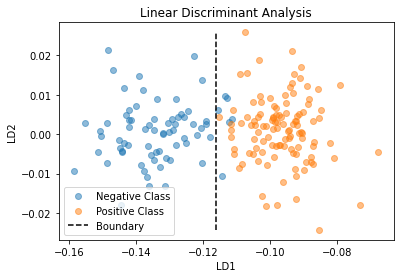

In [ ]:
# Compute class means and scatter matrices of Negative and Positive classes
mean1 = np.mean(X_train[y_train==0], axis=0)
mean2 = np.mean(X_train[y_train==1], axis=0)

# Variance of Negative and Positive classes
S1 = (X_train[y_train==0] - mean1).T.dot(X_train[y_train==0] - mean1)
S2 = (X_train[y_train==1] - mean2).T.dot(X_train[y_train==1] - mean2)
Sw = S1 + S2 
Sb = np.outer(mean2 - mean1, mean2 - mean1) 

# Compute eigenvectors and eigenvalues of Sw^-1*Sb
A = np.linalg.inv(Sw).dot(Sb)
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
w = eigenvectors[:, 0:2]

# Project data onto 2D using w
X_lda = X_test.dot(w)

# Compute decision boundary
threshold1 = (mean1.dot(w[:, 0]) + mean2.dot(w[:, 0])) / 2

# Plot data points and decision boundary
fig, ax = plt.subplots()
ax.scatter(X_lda[y_test==0, 0], X_lda[y_test==0, 1], label='Negative Class', alpha=0.5)
ax.scatter(X_lda[y_test==1, 0], X_lda[y_test==1, 1], label='Positive Class', alpha=0.5)
ax.plot([threshold1, threshold1], [np.min(X_lda[:, 1]), np.max(X_lda[:, 1])], color='k', linestyle='--', label='Boundary')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('Linear Discriminant Analysis')
ax.legend()
plt.show()

## Fisher’s linear discriminant model (FLDM2)

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


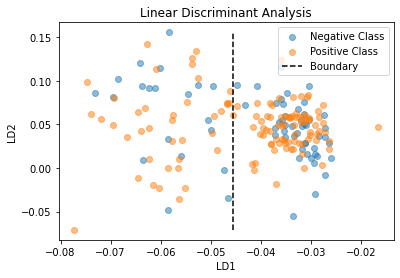

In [ ]:
# Randomize the order of the features
cols = list(df.columns)
np.random.shuffle(cols)

# use the shuffled list of column names to reorder the DataFrame
df = df[cols]
X = df.drop(['diagnosis','id'],axis=1).values
y = df['diagnosis'].values

# Splitting of dataset in training set and test set
test_size = 0.33
n_samples = X.shape[0]
test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets

# Randomize the order of the features
train_X_permuted = np.random.permutation(X_train)
test_X_permuted = np.random.permutation(X_test)

# Compute class means and scatter matrices
mean1 = np.mean(X_train[y_train==0], axis=0)
mean2 = np.mean(X_train[y_train==1], axis=0)

S1 = (train_X_permuted[y_train==0] - mean1).T.dot(train_X_permuted[y_train==0] - mean1)
S2 = (train_X_permuted[y_train==1] - mean2).T.dot(train_X_permuted[y_train==1] - mean2)
Sw = S1 + S2
Sb = np.outer(mean2 - mean1, mean2 - mean1) 

# Compute eigenvectors and eigenvalues of Sw^-1*Sb
A = np.linalg.inv(Sw).dot(Sb)
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
w = eigenvectors[:, 0:2]

# Project data onto 2D using w
X_lda = test_X_permuted.dot(w)

# Compute decision boundary
threshold1 = (mean1.dot(w[:, 0]) + mean2.dot(w[:, 0])) / 2

# Plot data points and decision boundary
fig, ax = plt.subplots()
ax.scatter(X_lda[y_test==0, 0], X_lda[y_test==0, 1], label='Negative Class', alpha=0.5)
ax.scatter(X_lda[y_test==1, 0], X_lda[y_test==1, 1], label='Positive Class', alpha=0.5)
ax.plot([threshold1, threshold1], [np.min(X_lda[:, 1]), np.max(X_lda[:, 1])], color='k', linestyle='--', label='Boundary')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('Linear Discriminant Analysis')
ax.legend()
plt.show()

# Part C – Logistic Regression

## Logistic Regression Class

In [ ]:
class LogisticRegression:
    def __init__(self, alpha=0.01, iterations=1000, batch_size=32):
        self.alpha = alpha
        self.iterations = iterations
        self.batch_size = batch_size
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(X.dot(theta))
        J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
        return J

    def batch_gradient_descent(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        cost_history = []
        for i in range(self.iterations):
            for j in range(0, m, self.batch_size):
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]
                h = self.sigmoid(X_batch.dot(theta))
                theta = theta - self.alpha * (1/self.batch_size) * X_batch.T.dot(h-y_batch)
                cost_history.append(self.cost_function(X_batch, y_batch, theta))
        return theta, cost_history

    def mini_batch_gradient_descent(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        cost_history = []
        for i in range(self.iterations):
            permutation = np.random.permutation(m)
            X_permuted = X[permutation]
            y_permuted = y[permutation]
            for j in range(0, m, self.batch_size):
                X_batch = X_permuted[j:j+self.batch_size]
                y_batch = y_permuted[j:j+self.batch_size]
                h = self.sigmoid(X_batch.dot(theta))
                theta = theta - self.alpha * (1/self.batch_size) * X_batch.T.dot(h-y_batch)
                cost_history.append(self.cost_function(X_batch, y_batch, theta))
        return theta, cost_history

    def stochastic_gradient_descent(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        cost_history = []
        for i in range(self.iterations):
            permutation = np.random.permutation(m)
            X_permuted = X[permutation]
            y_permuted = y[permutation]
            for j in range(m):
                x_j = X_permuted[j:]
                y_j = y_permuted[j:]
                h = self.sigmoid(x_j.dot(theta))
                theta = theta - self.alpha * (1/m) * x_j.T.dot(h-y_j)
                cost_history.append(self.cost_function(x_j, y_j, theta))
        return theta, cost_history

    def predict(self, X, theta, threshold=0.5):
        h = self.sigmoid(X.dot(theta))
        return (h >= threshold).astype(int)

## Bias Term Addition

In [ ]:
X = np.column_stack((np.ones(len(X)), X))

# Splitting of dataset in training set and test set
test_size = 0.33
n_samples = X.shape[0]
test_idx = np.random.choice(n_samples, int(n_samples * test_size), replace=False) # randomly select test indices
train_idx = np.setdiff1d(np.arange(n_samples), test_idx) # use remaining indices for training
X_train, X_test = X[train_idx], X[test_idx] # split features into training and test sets
y_train, y_test = y[train_idx], y[test_idx] # split labels into training and test sets

## LR1

### Batch Gradient Descent With Different Learning Rates (Alpha)

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.01)
    theta1, cost_history1 = lr1.batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.929, Precision = 0.917, Recall = 0.974
Iteration 3, LR1 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.001)
    theta1, cost_history1 = lr1.batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")
    
print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.931, Precision = 0.915, Recall = 0.980
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.929, Precision = 0.913, Recall = 0.980
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.931, Precision = 0.915, Recall = 0.980
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.933, Precision = 0.918, Recall = 0.980
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.933, Precision = 0.918, Recall = 0.980
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.931, Precision = 0.915, Recall = 0.980
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.929, Precision = 0.913, Recall = 0.980
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.931, Precision = 0.915, Recall = 0.980
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.933, Precision = 0.918, Recall = 0.980
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.933, Precision = 0.918, Recall = 0.980
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.931, Precision = 0.915, Recall = 0.980
Iteration 3, LR1 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.0001)
    theta1, cost_history1 = lr1.batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")
    
print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.922, Precision = 0.935, Recall = 0.940
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.925, Precision = 0.926, Recall = 0.957
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.922, Precision = 0.930, Recall = 0.946
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.922, Precision = 0.938, Recall = 0.938
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.917, Precision = 0.945, Recall = 0.920
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.922, Precision = 0.935, Recall = 0.940
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.925, Precision = 0.926, Recall = 0.957
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.922, Precision = 0.930, Recall = 0.946
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.922, Precision = 0.938, Recall = 0.938
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.917, Precision = 0.945, Recall = 0.920
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.922, Precision = 0.935, Recall = 0.940
Iteration 3, LR1 with

###  Mini Batch Gradient Descent With Different Learning Rates (Alpha)

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.01)
    theta1, cost_history1 = lr1.mini_batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.924, Precision = 0.933, Recall = 0.946
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.924, Precision = 0.933, Recall = 0.946
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.924, Precision = 0.933, Recall = 0.946
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.924, Precision = 0.933, Recall = 0.946
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.924, Precision = 0.933, Recall = 0.946
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.906, Precision = 0.873, Recall = 0.994
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.906, Precision = 0.873, Recall = 0.994
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.906, Precision = 0.873, Recall = 0.994
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.906, Precision = 0.873, Recall = 0.994
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.906, Precision = 0.873, Recall = 0.994
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.911, Precision = 0.952, Recall = 0.903
Iteration 3, LR1 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.001)
    theta1, cost_history1 = lr1.mini_batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
<ipython-input-5-7bdc6e4aa47a>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.913, Precision = 0.950, Recall = 0.909
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.915, Precision = 0.950, Recall = 0.912
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.915, Precision = 0.950, Recall = 0.912
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.913, Precision = 0.950, Recall = 0.909
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.913, Precision = 0.950, Recall = 0.909
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.920, Precision = 0.932, Recall = 0.940
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.922, Precision = 0.933, Recall = 0.943
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.920, Precision = 0.932, Recall = 0.940
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.920, Precision = 0.932, Recall = 0.940
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.920, Precision = 0.932, Recall = 0.940
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.876, Precision = 0.973, Recall = 0.824
Iteration 3, LR1 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.0001)
    theta1, cost_history1 = lr1.mini_batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.908, Precision = 0.875, Recall = 0.994
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.904, Precision = 0.871, Recall = 0.994
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.904, Precision = 0.871, Recall = 0.994
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.913, Precision = 0.882, Recall = 0.994
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.917, Precision = 0.886, Recall = 0.994
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.920, Precision = 0.932, Recall = 0.940
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.924, Precision = 0.923, Recall = 0.957
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.925, Precision = 0.933, Recall = 0.949
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.920, Precision = 0.937, Recall = 0.935
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.917, Precision = 0.939, Recall = 0.926
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.933, Precision = 0.913, Recall = 0.986
Iteration 3, LR1 with

### Stochaistic Gradient Descent With Different Learning Rates (Alpha)

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.01)
    theta1, cost_history1 = lr1.stochastic_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.941, Precision = 0.947, Recall = 0.960
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.941, Precision = 0.947, Recall = 0.960
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.941, Precision = 0.947, Recall = 0.960
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.941, Precision = 0.947, Recall = 0.960
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.941, Precision = 0.947, Recall = 0.960
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.938, Precision = 0.957, Recall = 0.943
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.938, Precision = 0.957, Recall = 0.943
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.938, Precision = 0.957, Recall = 0.943
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.938, Precision = 0.957, Recall = 0.943
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.938, Precision = 0.957, Recall = 0.943
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.940, Precision = 0.957, Recall = 0.946
Iteration 3, LR1 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.001)
    theta1, cost_history1 = lr1.stochastic_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
<ipython-input-5-7bdc6e4aa47a>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.940, Precision = 0.944, Recall = 0.960
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.941, Precision = 0.944, Recall = 0.963
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.941, Precision = 0.944, Recall = 0.963
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.940, Precision = 0.944, Recall = 0.960
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.940, Precision = 0.944, Recall = 0.960
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.940, Precision = 0.952, Recall = 0.952
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.941, Precision = 0.952, Recall = 0.955
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.940, Precision = 0.952, Recall = 0.952
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.940, Precision = 0.952, Recall = 0.952
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.940, Precision = 0.952, Recall = 0.952
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.877, Precision = 0.996, Recall = 0.807
Iteration 3, LR1 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr1 = LogisticRegression(alpha=0.0001)
    theta1, cost_history1 = lr1.stochastic_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr1.predict(X, theta1, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR1 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

<ipython-input-5-7bdc6e4aa47a>:13: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))


Iteration 1, LR1 with threshold 0.5: Accuracy = 0.915, Precision = 0.972, Recall = 0.889
Iteration 1, LR1 with threshold 0.3: Accuracy = 0.940, Precision = 0.962, Recall = 0.940
Iteration 1, LR1 with threshold 0.4: Accuracy = 0.936, Precision = 0.973, Recall = 0.923
Iteration 1, LR1 with threshold 0.6: Accuracy = 0.911, Precision = 0.981, Recall = 0.875
Iteration 1, LR1 with threshold 0.7: Accuracy = 0.906, Precision = 0.984, Recall = 0.864
Iteration 2, LR1 with threshold 0.5: Accuracy = 0.943, Precision = 0.952, Recall = 0.957
Iteration 2, LR1 with threshold 0.3: Accuracy = 0.941, Precision = 0.942, Recall = 0.966
Iteration 2, LR1 with threshold 0.4: Accuracy = 0.941, Precision = 0.944, Recall = 0.963
Iteration 2, LR1 with threshold 0.6: Accuracy = 0.941, Precision = 0.954, Recall = 0.952
Iteration 2, LR1 with threshold 0.7: Accuracy = 0.938, Precision = 0.957, Recall = 0.943
Iteration 3, LR1 with threshold 0.5: Accuracy = 0.881, Precision = 0.997, Recall = 0.812
Iteration 3, LR1 with

## LR2

### Batch Gradient Descent With Different Learning Rates (Alpha)

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.01)
    theta2, cost_history2 = lr2.batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.984, Precision = 0.975, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.988, Precision = 0.981, Recall = 1.000
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.984, Precision = 0.986, Recall = 0.989
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.975, Precision = 0.989, Recall = 0.972
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.984, Precision = 0.975, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.988, Precision = 0.981, Recall = 1.000
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.984, Precision = 0.986, Recall = 0.989
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.975, Precision = 0.989, Recall = 0.972
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 3, LR2 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.001)
    theta2, cost_history2 = lr2.batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.960, Precision = 0.939, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.974, Precision = 0.962, Recall = 0.997
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.975, Precision = 0.986, Recall = 0.975
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.965, Precision = 0.988, Recall = 0.955
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.960, Precision = 0.939, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.974, Precision = 0.962, Recall = 0.997
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.975, Precision = 0.986, Recall = 0.975
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.965, Precision = 0.988, Recall = 0.955
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 3, LR2 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.0001)
    theta2, cost_history2 = lr2.batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.963, Precision = 0.969, Recall = 0.972
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.938, Precision = 0.911, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.951, Precision = 0.932, Recall = 0.994
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.942, Precision = 0.985, Recall = 0.922
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.896, Precision = 0.990, Recall = 0.843
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.963, Precision = 0.969, Recall = 0.972
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.938, Precision = 0.911, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.951, Precision = 0.932, Recall = 0.994
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.942, Precision = 0.985, Recall = 0.922
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.896, Precision = 0.990, Recall = 0.843
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.963, Precision = 0.969, Recall = 0.972
Iteration 3, LR2 with

###  Mini Batch Gradient Descent With Different Learning Rates (Alpha)

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.01)
    theta2, cost_history2 = lr2.mini_batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.984, Precision = 0.975, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.988, Precision = 0.981, Recall = 1.000
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.984, Precision = 0.986, Recall = 0.989
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.975, Precision = 0.989, Recall = 0.972
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.984, Precision = 0.975, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.988, Precision = 0.981, Recall = 1.000
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.984, Precision = 0.986, Recall = 0.989
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.975, Precision = 0.989, Recall = 0.972
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 3, LR2 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.001)
    theta2, cost_history2 = lr2.mini_batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.960, Precision = 0.939, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.974, Precision = 0.962, Recall = 0.997
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.975, Precision = 0.986, Recall = 0.975
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.965, Precision = 0.988, Recall = 0.955
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.960, Precision = 0.939, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.974, Precision = 0.962, Recall = 0.997
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.975, Precision = 0.986, Recall = 0.975
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.965, Precision = 0.988, Recall = 0.955
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 3, LR2 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.0001)
    theta2, cost_history2 = lr2.mini_batch_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.963, Precision = 0.969, Recall = 0.972
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.938, Precision = 0.911, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.951, Precision = 0.932, Recall = 0.994
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.942, Precision = 0.985, Recall = 0.922
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.896, Precision = 0.990, Recall = 0.843
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.963, Precision = 0.969, Recall = 0.972
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.938, Precision = 0.911, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.951, Precision = 0.932, Recall = 0.994
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.942, Precision = 0.985, Recall = 0.922
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.896, Precision = 0.990, Recall = 0.843
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.963, Precision = 0.969, Recall = 0.972
Iteration 3, LR2 with

### Stochaistic Gradient Descent With Different Learning Rates (Alpha)

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.01)
    theta2, cost_history2 = lr2.stochastic_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.991, Precision = 0.989, Recall = 0.997
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.989, Precision = 0.983, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.988, Precision = 0.983, Recall = 0.997
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.982, Precision = 0.989, Recall = 0.983
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.979, Precision = 0.989, Recall = 0.978
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.991, Precision = 0.989, Recall = 0.997
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.988, Precision = 0.981, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.989, Precision = 0.986, Recall = 0.997
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.986, Precision = 0.989, Recall = 0.989
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.981, Precision = 0.989, Recall = 0.980
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.991, Precision = 0.989, Recall = 0.997
Iteration 3, LR2 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.001)
    theta2, cost_history2 = lr2.stochastic_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")

print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.986, Precision = 0.978, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.989, Precision = 0.983, Recall = 1.000
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.986, Precision = 0.986, Recall = 0.992
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.975, Precision = 0.989, Recall = 0.972
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.986, Precision = 0.978, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.989, Precision = 0.983, Recall = 1.000
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.986, Precision = 0.986, Recall = 0.992
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.975, Precision = 0.989, Recall = 0.972
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.988, Precision = 0.986, Recall = 0.994
Iteration 3, LR2 with

In [ ]:
accuracies = np.zeros((10, 5))
precisions = np.zeros((10, 5))
recalls = np.zeros((10, 5))

for i in range(10):
    lr2 = LogisticRegression(alpha=0.0001)
    theta2, cost_history2 = lr2.stochastic_gradient_descent(X.astype(float), y.astype(float))
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    for j, threshold in enumerate(thresholds):
        y_pred = lr2.predict(X, theta2, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        accuracies[i, j] = accuracy
        precisions[i, j] = precision
        recalls[i, j] = recall
        print(f"Iteration {i+1}, LR2 with threshold {threshold}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}")
    
print(f"Average accuracy for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(accuracies, axis=0)}")
print(f"Average precision for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(precisions, axis=0)}")
print(f"Average recall for 0.5, 0.3, 0.4, 0.6, 0.7 threshold: {np.mean(recalls, axis=0)}")

Iteration 1, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 1, LR2 with threshold 0.3: Accuracy = 0.967, Precision = 0.949, Recall = 1.000
Iteration 1, LR2 with threshold 0.4: Accuracy = 0.977, Precision = 0.967, Recall = 0.997
Iteration 1, LR2 with threshold 0.6: Accuracy = 0.979, Precision = 0.986, Recall = 0.980
Iteration 1, LR2 with threshold 0.7: Accuracy = 0.967, Precision = 0.988, Recall = 0.958
Iteration 2, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 2, LR2 with threshold 0.3: Accuracy = 0.967, Precision = 0.949, Recall = 1.000
Iteration 2, LR2 with threshold 0.4: Accuracy = 0.977, Precision = 0.967, Recall = 0.997
Iteration 2, LR2 with threshold 0.6: Accuracy = 0.979, Precision = 0.986, Recall = 0.980
Iteration 2, LR2 with threshold 0.7: Accuracy = 0.965, Precision = 0.986, Recall = 0.958
Iteration 3, LR2 with threshold 0.5: Accuracy = 0.984, Precision = 0.981, Recall = 0.994
Iteration 3, LR2 with

## Plot Learning Curves

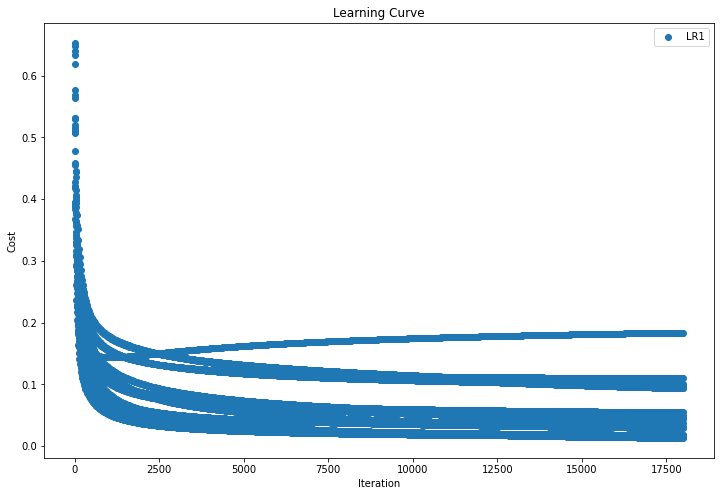

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter([y for y in range(len(lr2.batch_gradient_descent(X.astype(float), y.astype(float))[1]))], lr2.batch_gradient_descent(X.astype(float), y.astype(float))[1], label='LR1')
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

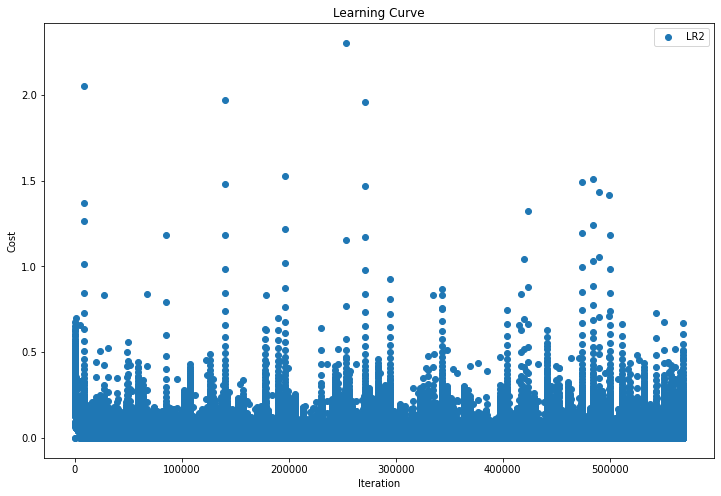

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter([y for y in range(len(lr2.mini_batch_gradient_descent(X.astype(float), y.astype(float))[1]))], lr2.mini_batch_gradient_descent(X.astype(float), y.astype(float))[1], label='LR2')
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

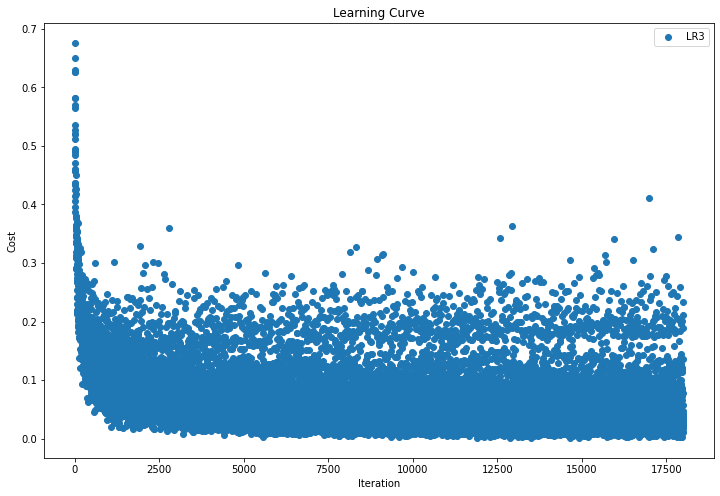

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter([y for y in range(len(lr2.mini_batch_gradient_descent(X.astype(float), y.astype(float))[1]))],lr2.mini_batch_gradient_descent(X.astype(float), y.astype(float))[1], label='LR3')
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()